In [1]:
!pip install -e ..

Obtaining file:///home/chris/Projects/ml_scratch
  Attempting uninstall: ml-scratch
    Found existing installation: ml-scratch 0.0.1
    Uninstalling ml-scratch-0.0.1:
      Successfully uninstalled ml-scratch-0.0.1
  Running setup.py develop for ml-scratch


In [2]:
import ml_scratch as ml
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [3]:
dataset = load_breast_cancer(as_frame=True)
features = dataset['data']
target = dataset['target']

In [4]:
features.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [5]:
X = np.array(features)[:, 0:2]

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
y = np.array(target)

# ml_scratch

In [7]:
model = ml.logisticRegression()
stime = time.time()
model.fit(X, y, method = 'gd')
etime = time.time()
print(f'\n\nTotal Time = {etime - stime} s')
print('\nWeights:\n')
print(model.w)

iteration: 0, cost: -166.82681737462485
iteration: 10, cost: -146.67946221188419
iteration: 20, cost: -145.73178316329358
iteration: 30, cost: -145.5923639279211
iteration: 40, cost: -145.56754812953935
iteration: 50, cost: -145.56281365601382
iteration: 60, cost: -145.5618841405801
iteration: 70, cost: -145.56169937354832
iteration: 80, cost: -145.561662444553
iteration: 90, cost: -145.5616550456478


Total Time = 0.004529476165771484 s

Weights:

[[ 0.70755997]
 [-3.72166988]
 [-0.9373621 ]]


In [8]:
model = ml.logisticRegression()
stime = time.time()
model.fit(X, y, method = 'newton')
etime = time.time()
print(f'\n\nTotal Time = {etime - stime} s')
print('\nWeights:\n')
print(model.w)

iteration: 0, cost: -198.19605924244138
iteration: 1, cost: -159.00131265715956
iteration: 2, cost: -147.43872687388716
iteration: 3, cost: -145.6257214773509
iteration: 4, cost: -145.5617551496688
iteration: 5, cost: -145.56165318932347
iteration: 6, cost: -145.56165318904536
iteration: 7, cost: -145.56165318904533
iteration: 8, cost: -145.56165318904533
iteration: 9, cost: -145.56165318904533


Total Time = 0.02627849578857422 s

Weights:

[[ 0.70756728]
 [-3.72200349]
 [-0.93740745]]


In [9]:
y_pred = model.predict(X)



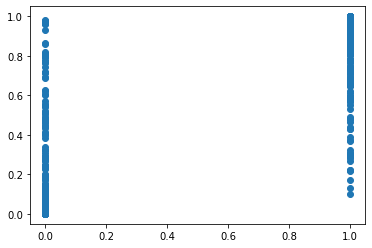

In [10]:
plt.scatter(y, y_pred)

/home/chris/miniconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


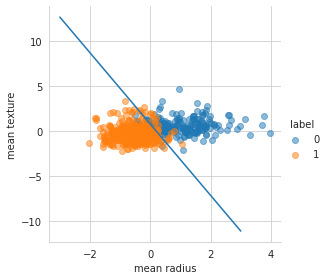

In [11]:
df = pd.DataFrame(X)
df.columns = ['mean radius', 'mean texture']
df['label']= y

sns.set_style("whitegrid")
sns.FacetGrid(df, hue="label", size=4) \
   .map(plt.scatter, "mean radius", "mean texture", alpha = 0.5) \
   .add_legend()

x_r = np.linspace(-3, 3, 200)
x_t = (- model.w[0] - model.w[1]*x_r)/model.w[2]
plt.plot(x_r, x_t)
plt.show()

# Scikit-learn


In [12]:
from sklearn.linear_model import LogisticRegression


In [13]:
model_sk = LogisticRegression()
model_sk

LogisticRegression()

In [14]:
stime = time.time()
model_sk.fit(X, y)
etime = time.time()

print(f'\n\nTotal Time = {etime - stime} s')




Total Time = 0.0020203590393066406 s


In [15]:
model_sk.predict(X)

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [16]:
w_sk = np.array([model_sk.intercept_[0], model_sk.coef_[0,0], model_sk.coef_[0,1]])
w_sk

array([ 0.69962639, -3.33731028, -0.8771414 ])

/home/chris/miniconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


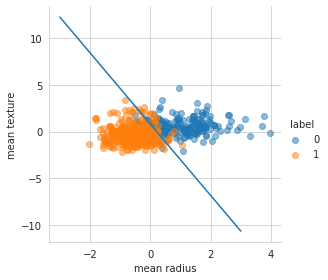

In [17]:
df = pd.DataFrame(X)
df.columns = ['mean radius', 'mean texture']
df['label']= y

sns.set_style("whitegrid")
sns.FacetGrid(df, hue="label", size=4) \
   .map(plt.scatter, "mean radius", "mean texture", alpha = 0.5) \
   .add_legend()

x_r = np.linspace(-3, 3, 200)
x_t = (- w_sk[0] - w_sk[1]*x_r)/w_sk[2]
plt.plot(x_r, x_t)
plt.show()



In [18]:
model.w

array([[ 0.70756728],
       [-3.72200349],
       [-0.93740745]])

In [19]:
w_sk

array([ 0.69962639, -3.33731028, -0.8771414 ])